# Dask graph computation

In [76]:
import dask.array as da

## Graph for chunk of operation

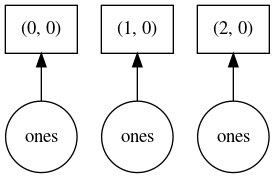

In [77]:
x = da.ones((6, 1), chunks=(2, 1))
x.visualize()

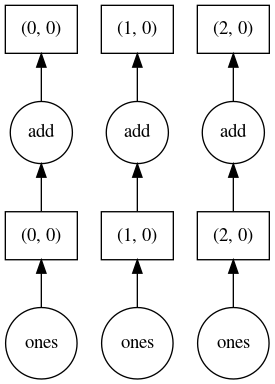

In [78]:
y = 2 + da.ones((6, 1), chunks=(2,1))
y.visualize()

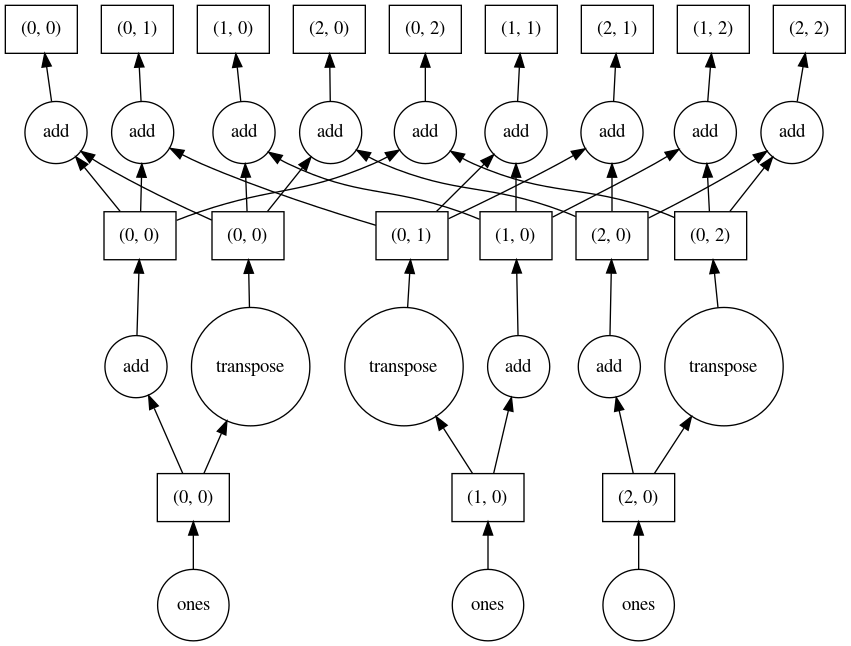

In [79]:
z = x.T+y
z.visualize()

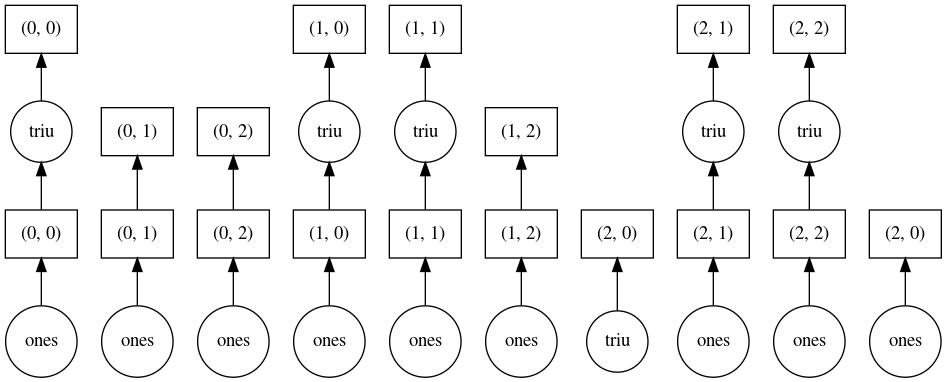

In [83]:
x = da.triu(da.ones((3, 3), chunks=(1, 1)))
x.visualize()

In [84]:
print("Compare this print of x:")
print(x)
print("\nWith this one:")
print(x.compute())

Compare this print of x:
dask.array<triu, shape=(3, 3), dtype=float64, chunksize=(1, 1)>

With this one:
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


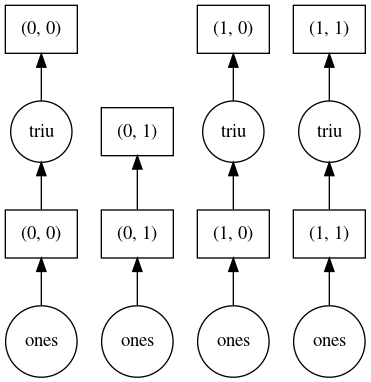

In [85]:
x = da.triu(da.ones((4, 4), chunks=(2, 2)))
x.visualize()

## Graph for parrallel chunk of operations

See here https://github.com/dask/dask-examples/blob/master/delayed.ipynb for more

In [33]:
# Init dummy functions
import time
import random

def inc(x):
    time.sleep(random.random())
    return x + 1

def dec(x):
    time.sleep(random.random())
    return x - 1
    
def add(x, y):
    time.sleep(random.random())
    return x + y

In [34]:
%%time
# Bench these sequential list of function calls:
x = inc(1) # Return 1 + 1 = 2
y = dec(2) # Return 2 - 1 = 1
z = add(x, y) # Return 2 + 1 = 3
print("z =",z,"\n")

z = 3 

CPU times: user 79 ms, sys: 10 ms, total: 89 ms
Wall time: 921 ms


note that the x and y computations are performed sequentially here, but could be done in parrallel

In [35]:
# Make these functions to be "lazy", so that they are executed only when needed:
import dask
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [36]:
%%time
# Bench the same sequential list of function calls, but let Dask decide if they should be computed or not ("lazy" mode):
x = inc(1)
y = dec(2)
z = add(x, y)
print("z =",z,"\n")

z = Delayed('add-4f53cc93-29f6-4f8b-9bbd-454c23adeaff') 

CPU times: user 0 ns, sys: 2 ms, total: 2 ms
Wall time: 566 µs


see:

- that `z` is now a `delayed` Dask object, the result (3) is not returned
- how the wall time is much shorter, that's because the computation was not performed, only the graph was built

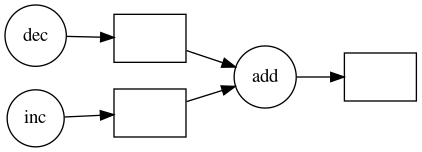

In [37]:
# This is the graph:
z.visualize(rankdir='LR')

In [38]:
%%time
# In order to realy get the computation done, simple call "compute":
print("z =",z.compute(),"\n")

z = 3 

CPU times: user 87 ms, sys: 9 ms, total: 96 ms
Wall time: 1.06 s


In [47]:
# from dask.distributed import Client
# client = Client(threads_per_worker=4, n_workers=1, processes=False)
client = Client("tcp://127.0.0.1:50904", processes=False)
client

RuntimeError: can't start new thread

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7ff2e40ae840>, <Future finished exception=RuntimeError("can't start new thread",)>)
Traceback (most recent call last):
  File "/home8/homedir3/perso/gmaze/miniconda3/envs/obidam36/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home8/homedir3/perso/gmaze/miniconda3/envs/obidam36/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home8/homedir3/perso/gmaze/miniconda3/envs/obidam36/lib/python3.6/site-packages/tornado/ioloop.py", line 779, in _discard_future_result
    future.result()
  File "/home8/homedir3/perso/gmaze/miniconda3/envs/obidam36/lib/python3.6/site-packages/tornado/gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "/home8/homedir3/perso/gmaze/miniconda3/envs/obidam36/lib/python3.6/site-packages/distributed/client.py

In [43]:
%%time
# In order to realy get the computation done, simple call "compute":
print("z =",z.compute(),"\n")

z = 3 

CPU times: user 69 ms, sys: 6 ms, total: 75 ms
Wall time: 678 ms
